# Real World Networks

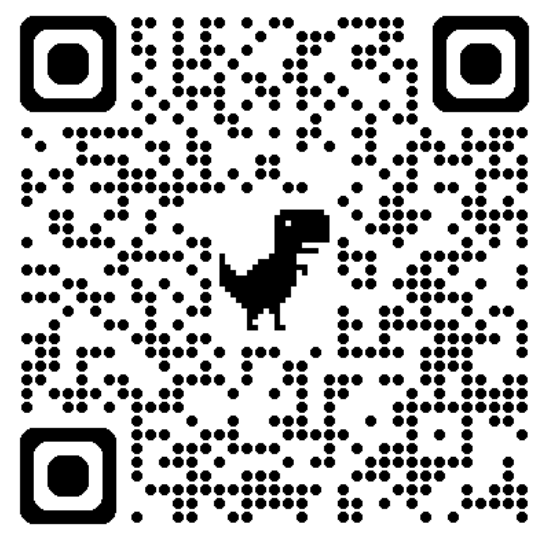

In [30]:
# First step: Import necessary libraries
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations, arrays, and matrices
import powerlaw  # For analyzing heavy-tailed distributions, including power laws
import networkx as nx  # For creating and analyzing networks (graphs)
import time  # For measuring time and handling time-related functions
import timeit  # For timing code execution (performance testing)
import pandas as pd  # For data manipulation and analysis (DataFrames)
import scipy.stats  # For statistical functions and probability distributions
from collections import Counter  # For counting elements (useful for degree distributions)
from networkx.algorithms.community import greedy_modularity_communities

## Zachary's Karate Club

The **Zachary's karate club network** captures interactions among 34 members of a karate club, documenting links between members who interacted outside the club. Introduced by W. Zachary in 1977, it has become iconic in network science, with many conferences (e.g., NetSci, CompleNet) offering prizes for the best insights using this graph.

You can load it in NetworkX with:

```python
nx.karate_club_graph()
```

For more information, see: [Zachary's Karate Club Network](https://networkkarate.tumblr.com/#:~:text=Philipp%20H%C3%B6vel%20is%20the%2017th,Tarragona%2C%20Spain%2C%20March%202019)

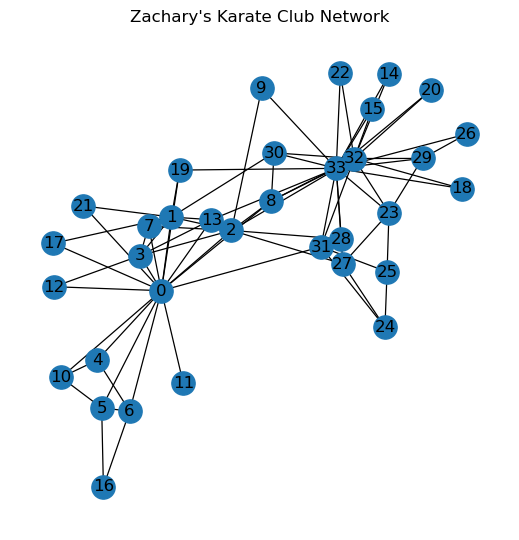

In [8]:
# Load Zachary's karate club graph
G = nx.karate_club_graph()

# Compute layout using spring layout (force-directed layout)
pos = nx.spring_layout(G)

# Draw the network
plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, font_weight='light', node_size=280, width=0.9)
plt.title("Zachary's Karate Club Network")
plt.show()


Due to a conflict between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), the club split into two. Half of the members followed Mr. Hi to form a new club, while the rest either found a new instructor or quit karate.

The two groups are shown below. 

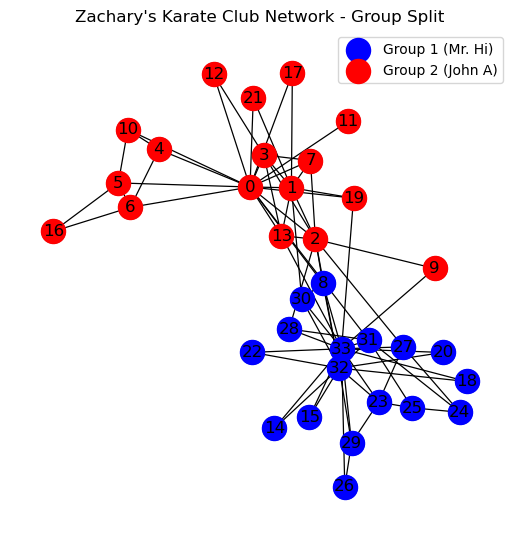

In [12]:
# Group divisions
group1 = [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
group2 = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21]

# Compute layout
pos = nx.spring_layout(G)

# Draw the entire network with labels
plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, font_weight='light', node_size=280, width=0.9)

# Highlight group1 in blue and group2 in red
nx.draw_networkx_nodes(G, pos, nodelist=group1, node_color='b', label='Group 1 (Mr. Hi)')
nx.draw_networkx_nodes(G, pos, nodelist=group2, node_color='r', label='Group 2 (John A)')

# Show the plot
plt.title("Zachary's Karate Club Network - Group Split")
plt.legend()
plt.show()


### Degree

Now, we can use centrality measures to try and identify the administrator "John A" and the instructor "Mr. Hi" within the two groups. One of the simplest and most intuitive measures is degree centrality, which counts the number of connections (degree) each node has.

We can compute the degree centrality of each node using NetworkX.

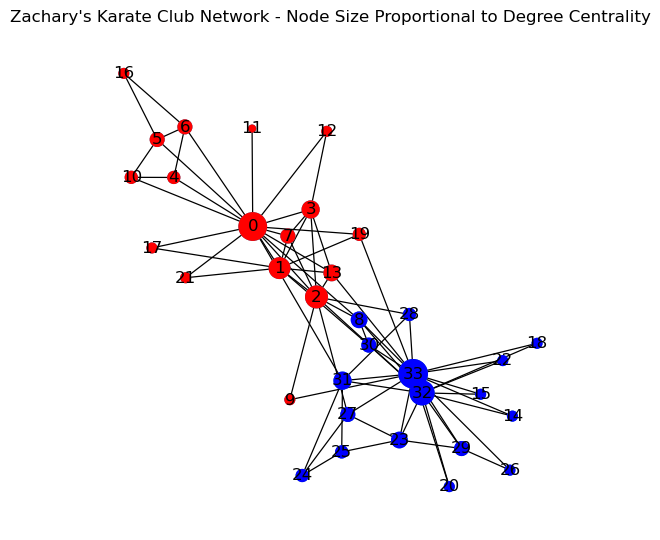

In [15]:
# Compute degree centrality for each node
degree_cent = nx.degree_centrality(G)

# Compute spring layout positions for the graph
pos = nx.spring_layout(G)

# Draw the entire graph, with node size proportional to degree centrality
plt.figure(figsize=(5, 5))
nx.draw(G, pos, node_size=[degree_cent[key] * 800 for key in degree_cent.keys()], edge_color='k',
        with_labels=True, width=0.9)

# Highlight group1 in blue and group2 in red, with node size proportional to degree centrality
nx.draw_networkx_nodes(G, pos, nodelist=group1, node_color='b',
                       node_size=[degree_cent[key] * 800 for key in group1])
nx.draw_networkx_nodes(G, pos, nodelist=group2, node_color='r',
                       node_size=[degree_cent[key] * 800 for key in group2])

# Show the plot
plt.title("Zachary's Karate Club Network - Node Size Proportional to Degree Centrality")
plt.show()


As you can see, nodes **33** and **0** serve as the central hubs for their respective groups. We can perform a similar analysis using **betweenness centrality**, and we expect to observe similar results.

### Betweenness Centrality

Another important measure of centrality is **betweenness centrality**. It captures how central a node is by measuring the fraction of all shortest paths between pairs of nodes that pass through that node. Mathematically, the betweenness centrality of a node $ v $ is defined as:

$
c(v) = \sum_{s,t} \frac{\sigma(s,t|v)}{\sigma(s,t)}
$

where:

- $ \sigma(s,t) $ is the total number of shortest paths from node $ s $ to node $ t $,
- $ \sigma(s,t|v) $ is the number of those shortest paths that pass through node $ v $.

Compared to **degree centrality**, **betweenness centrality** provides a more dynamic view of a node’s importance, as it considers how often a node acts as a bridge along the shortest path between other nodes.

We can compute betweenness centrality for each node using the NetworkX function:

```python
nx.betweenness_centrality(G)
```

For more details, refer to the [documentation](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html).

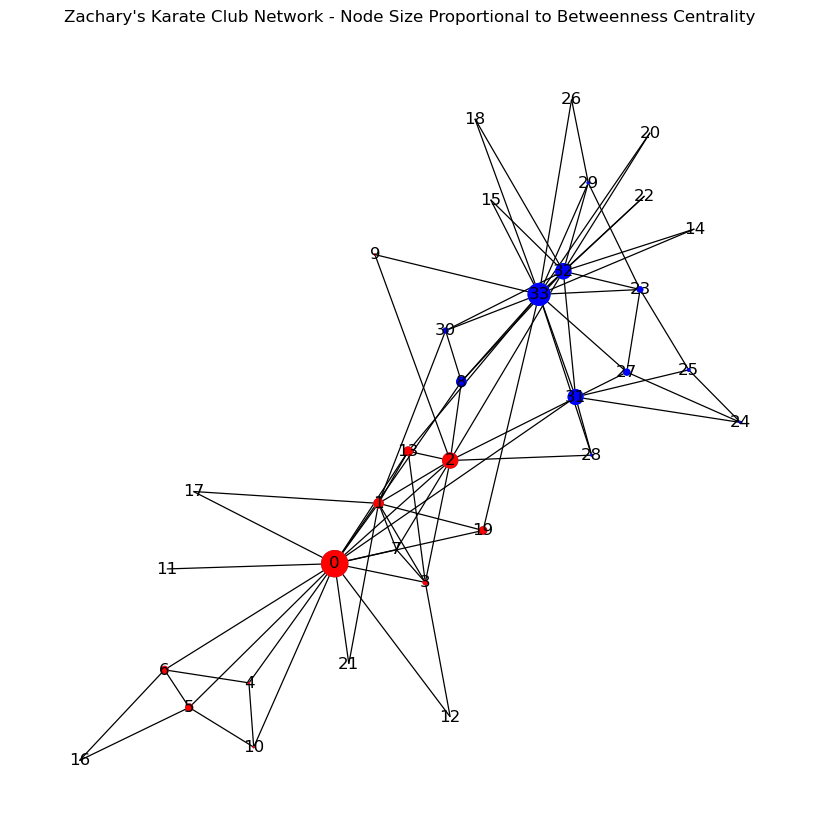

In [16]:
# Compute betweenness centrality (normalized)
G_bet = nx.betweenness_centrality(G, normalized=True)

# Compute layout positions for the nodes
pos = nx.spring_layout(G)

# Draw the network with node sizes proportional to betweenness centrality
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=[G_bet[key] * 800 for key in G_bet.keys()], edge_color='k', 
        with_labels=True, width=0.9)

# Highlight group 1 in blue
nx.draw_networkx_nodes(G, pos, nodelist=group1, node_color='b',
                       node_size=[G_bet[key] * 800 for key in group1])

# Highlight group 2 in red
nx.draw_networkx_nodes(G, pos, nodelist=group2, node_color='r',
                       node_size=[G_bet[key] * 800 for key in group2])

# Show the plot
plt.title("Zachary's Karate Club Network - Node Size Proportional to Betweenness Centrality")
plt.show()


### The importance of the hubs

Lets try to remove Mr Hi and John A and see what happens.

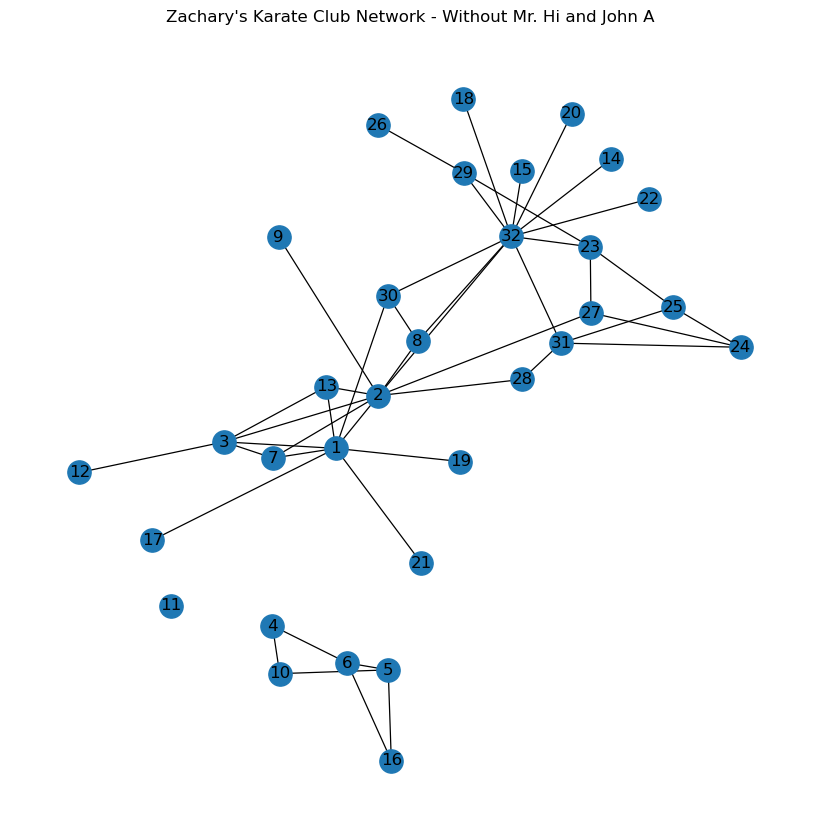

In [22]:
# Load Zachary's karate club graph
G = nx.karate_club_graph()

# Compute layout positions before modifying the graph
pos = nx.spring_layout(G)

# Remove Mr. Hi (node 0)
G.remove_node(0)

# Remove John A (node 33)
G.remove_node(33)

# Draw the network without Mr. Hi and John A
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_size=280, with_labels=True, width=0.9)

plt.title("Zachary's Karate Club Network - Without Mr. Hi and John A")
plt.show()


As you can see, removing **Mr. Hi** and **John A** has significantly disrupted the network structure!

In many cases, you will want to focus on the **giant connected component (GCC)**, which represents the largest subnetwork that remains connected. You can extract the GCC using the following NetworkX function:

```python
nx.connected_components(G)
```

This function returns all connected components, allowing you to isolate the largest one for further analysis.

Size of connected component 0: 26
Size of connected component 1: 5
Size of connected component 2: 1


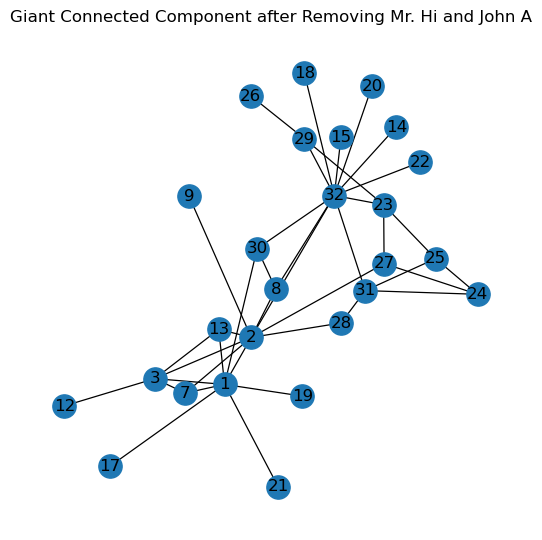

In [26]:
# Identify all connected components, sorted by size in descending order
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

# Print the size of each connected component
for i, component in enumerate(Gcc):
    print(f"Size of connected component {i}: {len(component)}")

# Extract the giant connected component (GCC)
G0 = G.subgraph(Gcc[0])

# Draw the giant connected component
plt.figure(figsize=(5,5))
nx.draw(G0, pos, node_size=280, with_labels=True, width=0.9)

plt.title("Giant Connected Component after Removing Mr. Hi and John A")
plt.show()


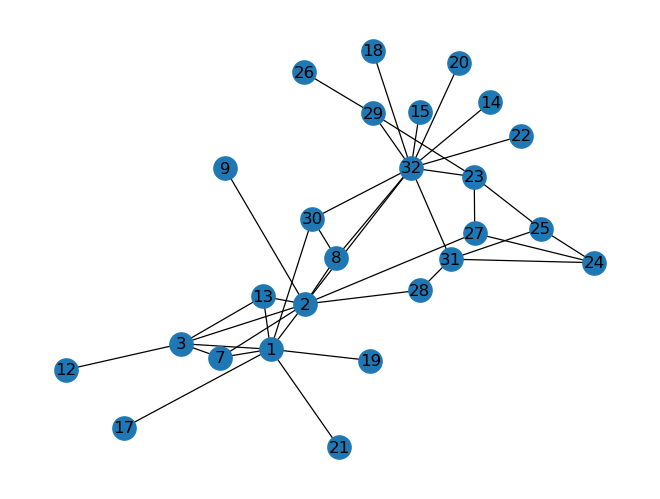

### Community Detection

We can identify communities (partitions) in a network using community detection algorithms based on score functions. One of the most well-known score functions is **Modularity**.

### Modularity
**Modularity** measures the strength of a network's division into communities (modules). Networks with high modularity have dense connections within communities but sparse connections between nodes in different communities.

The formula for modularity $ Q $ is:

$
Q = \frac{1}{2m} \sum_{vw} \left[ A_{vw} - \frac{k_v k_w}{2m} \right] \delta(c_v, c_w)
$

Where:
- $ \frac{1}{2m} $ is a normalization factor.
- $ A_{vw} $ is the element $ vw $ of the adjacency matrix.
- $ \frac{k_v k_w}{2m} $ is the expected probability that a random edge connects nodes  v  and  w .
- $ \delta(c_v, c_w) $ is the **Dirac delta function**, which is 1 if  v  and  w  are in the same community, and 0 otherwise.

### Steps to Maximize Modularity:

1. **Initial Partition**: Start with an initial partition of the network and compute  Q .
2. **Adjust Partitions**: Change the partition configuration and recalculate  Q .
3. **Optimize**: Repeat this process several times, keeping the partition with the highest value of  Q .

### Example: Relaxed Caveman Graph

As an example, we will apply community detection to a **relaxed caveman graph**, which has a well-defined community structure.

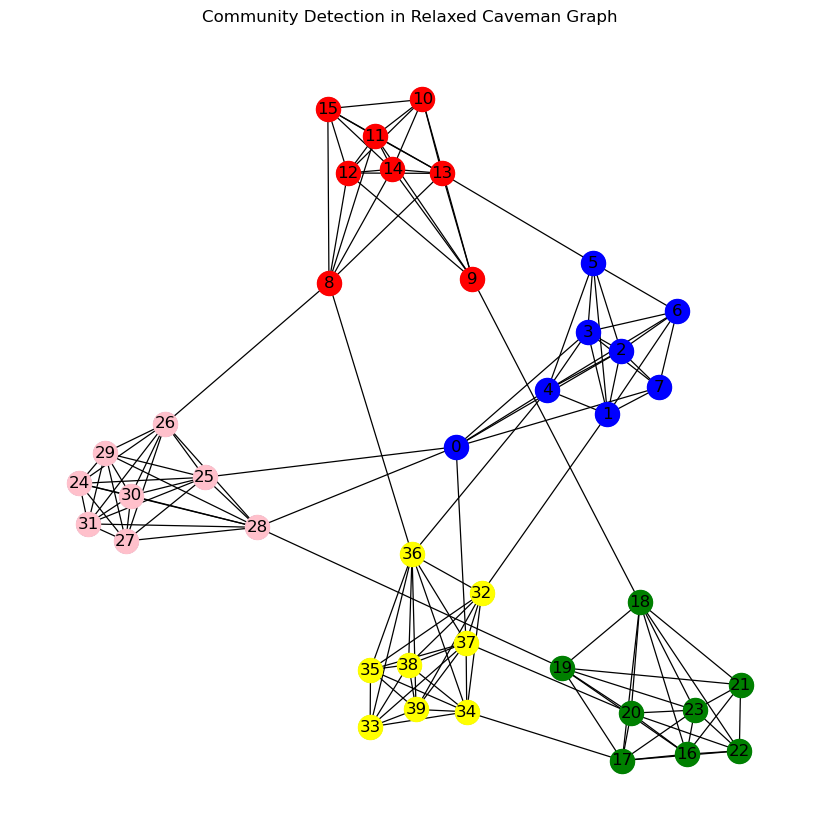

In [29]:
# Generate the relaxed Caveman Graph: 5 cliques (communities), 8 nodes per clique, 0.1 rewiring probability
G = nx.relaxed_caveman_graph(5, 8, 0.1)

# Detect communities using modularity maximization (Greedy algorithm by Newman, Clauset, and Moore)
communities = list(greedy_modularity_communities(G))

# Compute spring layout positions for visualization
pos = nx.spring_layout(G)

# Draw the entire graph
plt.figure(figsize=(8, 8))
nx.draw(G, pos, edge_color='k', with_labels=True, node_size=280, width=0.9)

# Draw nodes for each community with a different color
colors = ['b', 'r', 'g', 'pink', 'yellow']  # Colors for different communities
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i])

# Show the plot
plt.title("Community Detection in Relaxed Caveman Graph")
plt.show()


The community structure is also visible in the adjacency matrix of the relaxed caveman graph.

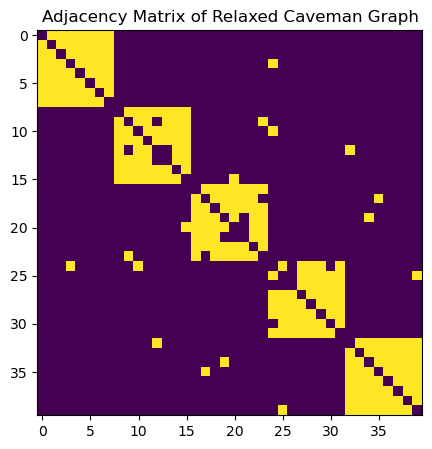

In [36]:
# Convert the graph to an adjacency matrix
adj_matrix = nx.to_numpy_array(G)

# Plot the adjacency matrix
plt.figure(figsize=(5, 5))
plt.imshow(adj_matrix, interpolation='none')
plt.title("Adjacency Matrix of Relaxed Caveman Graph")
plt.show()


If we change the order of the nodes, the community structure becomes unrecognizable.

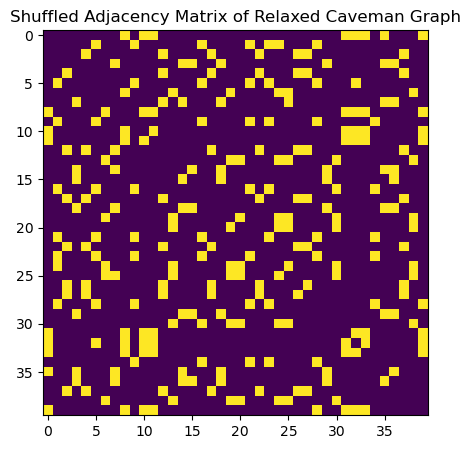

In [41]:
# Get the number of nodes and shuffle their order
indices = [k for k in range(G.number_of_nodes())]
np.random.shuffle(indices)

# Plot the adjacency matrix after shuffling node order
plt.figure(figsize=(5, 5))
plt.imshow(nx.to_numpy_array(G)[indices][:, indices], interpolation='none')
plt.title("Shuffled Adjacency Matrix of Relaxed Caveman Graph")
plt.show()


### Assortativity vs Disassortativity

Another interesting property found in many real-world networks is **assortativity**, which refers to:

> "The preference for a network's nodes to attach to others that are similar in some way."  
> [Source](https://en.wikipedia.org/wiki/Assortativity)

Assortative mixing can be classified into two types:

- **Assortativity**: Nodes tend to connect with others that have similar degree values (common in social networks).
- **Disassortativity**: High-degree nodes tend to connect with low-degree nodes (common in technological and biological networks).

The difference in these tendencies stems from the underlying purposes and structures of the networks: social networks value mutual influence, while technological and biological systems value efficiency and robustness.
As an example, we will explore these properties using two real-world networks.

We can compute the **average neighbor degree** using the built-in NetworkX function:

```python
nx.average_neighbor_degree(G)
```

For more details, refer to the [documentation](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.assortativity.average_neighbor_degree.html).

### Assortative: Ego-facebook network

This dataset consists of **'circles'** (or **'friends lists'**) from Facebook. Nodes represent users, and two users are connected if they are friends. You can explore the dataset at [Facebook Circles Dataset](https://snap.stanford.edu/data/ego-Facebook.html).

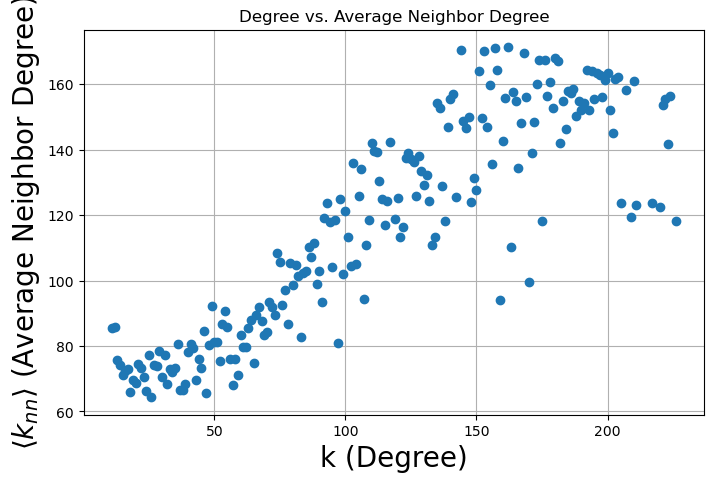

In [53]:
# Load the edgelist from the file
edges = np.loadtxt("ego.txt")

# Initialize the graph and add edges from the edgelist
G = nx.Graph()
G.add_edges_from(edges.astype(int))

# Compute the average neighbor degree and node degree
avg_neighbor_degree = nx.average_neighbor_degree(G)
degree = dict(G.degree())  # Convert to a dictionary for easy access

# Prepare lists to store degree (k) and average neighbor degree
x = []
y = []

# Extract degree and average neighbor degree values
for node in avg_neighbor_degree.keys():
    x.append(degree[node])        # Degree of the node
    y.append(avg_neighbor_degree[node])  # Average neighbor degree

# Convert to numpy arrays for easier processing
x = np.array(x)
y = np.array(y)

# Calculate the average of the neighbor degree for each unique degree value
avg_y = [np.mean(y[x == k]) for k in np.unique(x)]

# Plot the results (ignoring the first and last few points for clarity)
plt.figure(figsize=(8, 5))
plt.plot(np.unique(x)[10:-13], avg_y[10:-13], marker="o", ls="None")
plt.xlabel("k (Degree)", fontsize=20)
plt.ylabel(r"$\langle k_{nn} \rangle$ (Average Neighbor Degree)", fontsize=20)
#plt.yscale('log')
#plt.xscale('log')
plt.title("Degree vs. Average Neighbor Degree")
plt.grid(True)
plt.show()


### Disassortative: CAIDA 

In this example, we analyze the **CAIDA network**, which can be found [here](https://snap.stanford.edu/data/as-733.html). In this network, nodes represent **routers**, and two nodes are connected if there is an exchange of traffic flow between them.


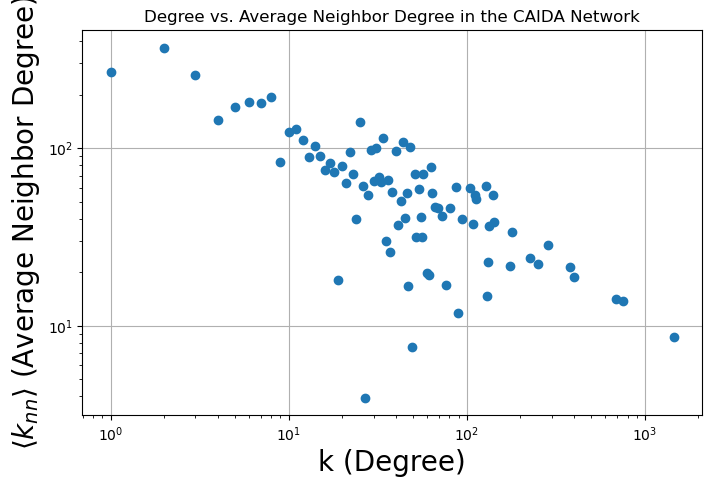

In [54]:
# Load the edgelist from the file
edges = np.loadtxt("CAIDA.txt")

# Initialize the graph and add edges from the edgelist
G = nx.Graph()
G.add_edges_from(edges.astype(int))

# Compute the average neighbor degree and node degree
avg_neighbor_degree = nx.average_neighbor_degree(G)
degree = dict(G.degree())  # Convert to a dictionary for easier access

# Prepare lists to store degree (k) and average neighbor degree
x = []
y = []

# Extract degree and average neighbor degree values
for node in avg_neighbor_degree.keys():
    x.append(degree[node])        # Degree of the node
    y.append(avg_neighbor_degree[node])  # Average neighbor degree

# Convert to numpy arrays for easier processing
x = np.array(x)
y = np.array(y)

# Calculate the average of the neighbor degree for each unique degree value
avg_y = [np.mean(y[x == k]) for k in np.unique(x)]

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(np.unique(x), avg_y, marker="o", ls="None")
plt.xlabel("k (Degree)", fontsize=20)
plt.ylabel(r"$\langle k_{nn} \rangle$ (Average Neighbor Degree)", fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.title("Degree vs. Average Neighbor Degree in the CAIDA Network")
plt.grid(True)
plt.show()


### Network Visualization

In the study "*Superspreading k-cores at the center of COVID-19 pandemic persistence*" ([source](https://arxiv.org/pdf/2103.08685.pdf)), the network represents human interactions during the COVID-19 pandemic. In this network:
- **Nodes** represent individuals (people).
- **Edges** represent **contacts** between people, indicating potential pathways for virus transmission.

This type of visualization helps to identify key individuals or groups (such as **superspreaders**) and understand how they contribute to the persistence of the pandemic through dense, interconnected **k-cores** in the network.

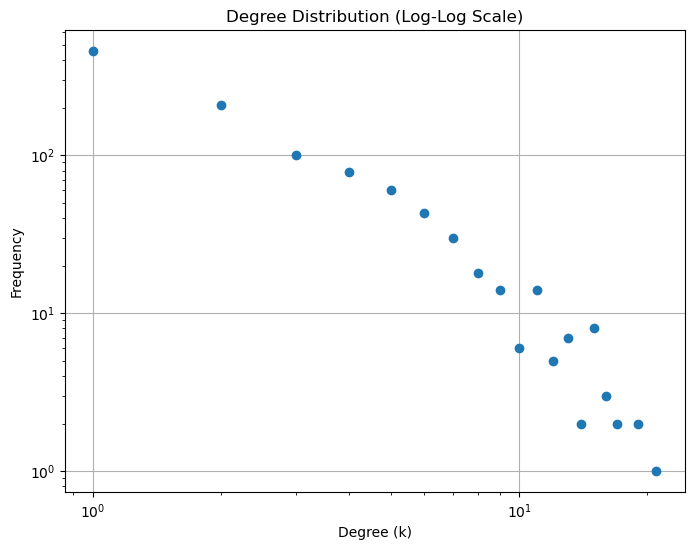

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Load the graph from GML file
H = nx.read_gml("gc_24.gml", label=None)

# Compute degrees of each node in the graph
degrees = [H.degree(n) for n in H.nodes()]

# Plot the degree distribution
x, y = np.unique(degrees, return_counts=True)
plt.figure(figsize=(8, 6))
plt.loglog(x, y, 'o', label='Degree Distribution')
plt.xlabel('Degree (k)')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Log-Log Scale)')
plt.grid(True)

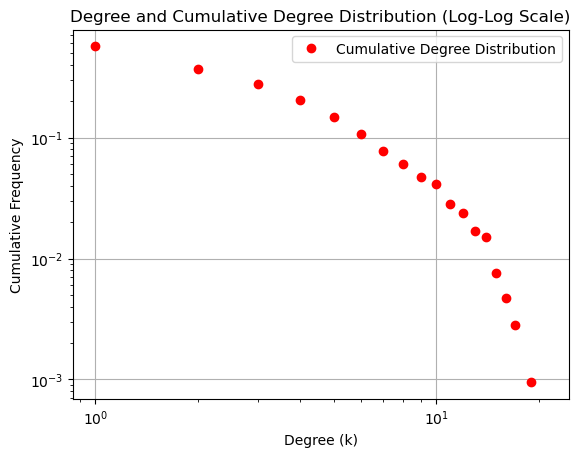

In [64]:
# Compute and plot the cumulative distribution
y_c = 1 - np.cumsum(y / sum(y))  # Cumulative distribution
plt.loglog(x, y_c, 'o', label='Cumulative Degree Distribution', color='red')
plt.xlabel('Degree (k)')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.title('Degree and Cumulative Degree Distribution (Log-Log Scale)')
plt.grid(True)
plt.show()


You can export your network to a GML file and then visualize it using **Gephi**, a popular tool for network visualization and analysis. To export your graph in GML format for Gephi, use the following code:

```python
nx.write_gml(H, "your_graph.gml")
```

This will save your graph as `your_graph.gml`, which can then be imported into Gephi.

### Next Step: Visualize the Network in Gephi
1. **Download and install Gephi**: [Install Gephi](https://gephi.org/users/install/)
2. **Open Gephi**: Launch Gephi and use the **"Open"** option to load the GML file (`your_graph.gml`).
3. **Explore your network**: Gephi provides a variety of tools for layout, filtering, and analyzing the graph.